<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/data-analysis/UpsamplingAndDownsampling(TimeSeries).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [4]:
# Downsampling; per quarter

quarterly_df = df.resample('Q', on='Month').mean()
quarterly_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [9]:
# Downsampling; total miles per year

yearly_total = df.resample('A', on='Month').sum()
yearly_total.head(10)

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515
1968-12-31,128975
1969-12-31,143664
1970-12-31,157497


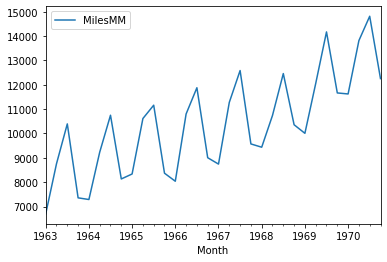

In [11]:
quarterly_df.plot()

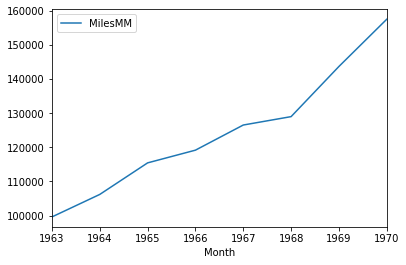

In [12]:
yearly_total.plot()

In [14]:
# Upsampling

upsampled_df = df.resample('D', on='Month').mean()
upsampled_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [15]:
# Upsampling; Filling in missing values using the linear method

interpolated_df = upsampled_df.interpolate(method='linear')
interpolated_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


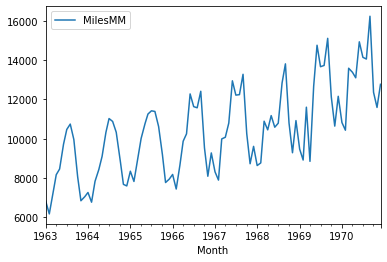

In [18]:
interpolated_df.plot()

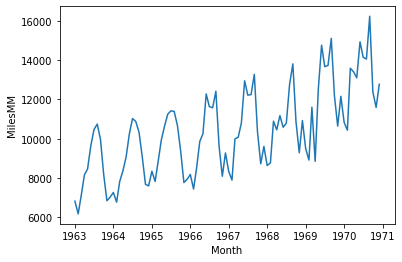

In [20]:
sns.lineplot(x=df['Month'], y=df['MilesMM'])